In [143]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from dateutil import parser

In [144]:
penjualan_pizza = pd.read_csv ('penjualan_pizza_impact_2023.csv')
pd.set_option ('display.max_columns', None)
penjualan_pizza.head()

,Outlet,Receipt Number,Date,Time,Category,Brand,Items,Variant,SKU,Quantity,Modifier Applied,Discount Applied,Gross Sales,Discounts,Refunds,Net Sales,Gratuity,Tax,Sales Type,Collected By,Served By,Customer,Payment Method,Event Type,Reason of Refund
0,Pizza Impact,JV1OZ4,31-12-2023,19:31:06,SLICE,Unbranded,Slice Cheese,NaN,NaN,1,NaN,50k for 2 slices 2,30000.0,4736.842,0.0,25263.158,0.0,0.0,Dine In,Pizza Impact,NaN,NaN,BCA QR,Payment,NaN
1,Pizza Impact,JV1OZ4,31-12-2023,19:31:06,SLICE,Unbranded,Slice Pepperoni,NaN,NaN,1,NaN,50k for 2 slices 2,35000.0,5526.316,0.0,29473.684,0.0,0.0,Dine In,Pizza Impact,NaN,NaN,BCA QR,Payment,NaN
2,Pizza Impact,JV1OZ4,31-12-2023,19:31:06,SLICE,Unbranded,Mac & cheese,NaN,14080.0,1,NaN,"promo new menu, 50k for 2 slices 2",35000.0,9736.842,0.0,25263.158,0.0,0.0,Dine In,Pizza Impact,NaN,NaN,BCA QR,Payment,NaN
3,Pizza Impact,JV1OZ3,31-12-2023,18:49:53,SLICE,Unbranded,Box Slice,NaN,NaN,1,NaN,NaN,3000.0,0.000,0.0,3000.000,0.0,0.0,Dine In,Pizza Impact,NaN,NaN,Cash,Payment,NaN
4,Pizza Impact,JV1OZ2,31-12-2023,18:19:34,PIE,Unbranded,Full Refund for: JV1OZ2 - MIX,NaN,NaN,-1,NaN,"50k for 2 slices 1, 50k for 2 slices 3",0.0,-30000.000,230000.0,-200000.000,0.0,0.0,Dine In,Pizza Impact,NaN,NaN,BCA,Refund,Accidental Charge


In [145]:
sales_pizza = penjualan_pizza[['Date','Items','Quantity','Net Sales']]
sales_pizza.head()

,Date,Items,Quantity,Net Sales
0,31-12-2023,Slice Cheese,1,25263.158
1,31-12-2023,Slice Pepperoni,1,29473.684
2,31-12-2023,Mac & cheese,1,25263.158
3,31-12-2023,Box Slice,1,3000.000
4,31-12-2023,Full Refund for: JV1OZ2 - MIX,-1,-200000.000


In [146]:
sales_pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5296 entries, 0 to 5295
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5296 non-null   object 
 1   Items      5296 non-null   object 
 2   Quantity   5296 non-null   int64  
 3   Net Sales  5296 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 165.6+ KB


In [147]:
sales_pizza['Date'] = pd.to_datetime(sales_pizza['Date'])
sales_pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5296 entries, 0 to 5295
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5296 non-null   datetime64[ns]
 1   Items      5296 non-null   object        
 2   Quantity   5296 non-null   int64         
 3   Net Sales  5296 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 165.6+ KB


C:\Users\ibnu\AppData\Local\Temp\ipykernel_14108\3180671812.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sales_pizza['Date'] = pd.to_datetime(sales_pizza['Date'])
C:\Users\ibnu\AppData\Local\Temp\ipykernel_14108\3180671812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_pizza['Date'] = pd.to_datetime(sales_pizza['Date'])


In [148]:
sales_pizza['Date'] = sales_pizza['Date'].dt.strftime('%B')
sales_pizza.head()

C:\Users\ibnu\AppData\Local\Temp\ipykernel_14108\3838385501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_pizza['Date'] = sales_pizza['Date'].dt.strftime('%B')


,Date,Items,Quantity,Net Sales
0,December,Slice Cheese,1,25263.158
1,December,Slice Pepperoni,1,29473.684
2,December,Mac & cheese,1,25263.158
3,December,Box Slice,1,3000.000
4,December,Full Refund for: JV1OZ2 - MIX,-1,-200000.000


In [149]:
bulan_urut = {'January': 1, 'February': 2, 'March': 3, 'April': 4,
               'May': 5, 'June': 6, 'July': 7, 'August': 8, 
               'September': 9, 'October': 10, 'November': 11, 'December': 12}

total_Sales = sales_pizza.groupby('Date')[['Net Sales']].sum()
total_Sales = total_Sales.reset_index()
total_Sales['Date'] = total_Sales['Date'].map(bulan_urut)
# Sort by the new 'Month' column
total_Sales = total_Sales.sort_values(by='Date')

# Map numeric values back to month names
total_Sales['Date'] = total_Sales['Date'].map({v: k for k, v in bulan_urut.items()})


# Reset index
total_Sales.reset_index(drop=True, inplace=True)

total_Sales

,Date,Net Sales
0,January,2.178550e+07
1,February,1.450300e+07
2,March,1.322600e+07
3,April,1.528200e+07
4,May,1.582500e+07
5,June,1.450600e+07
6,July,1.329200e+07
7,August,1.381600e+07
8,September,1.536300e+07
9,October,1.243900e+07


Text(0, 0.5, 'PROFIT')

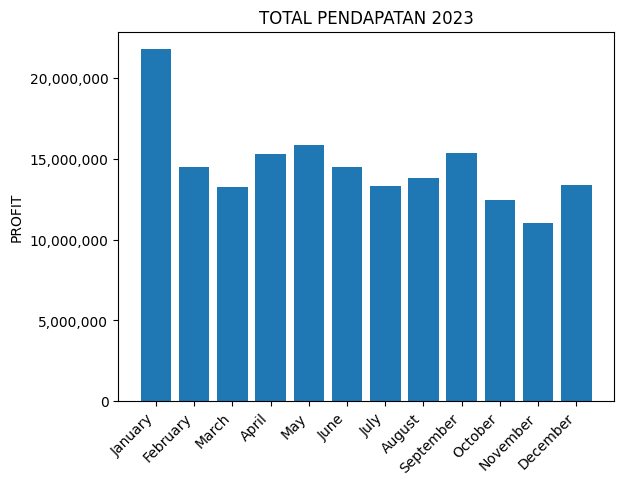

In [150]:
# PROFIT BULANAN
plt.bar(total_Sales['Date'], total_Sales['Net Sales'])
plt.title('TOTAL PENDAPATAN 2023')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.ylabel('PROFIT')


In [155]:
item_fav = sales_pizza.groupby ('Items') ['Quantity'].sum()
item_fav = item_fav[~item_fav.index.str.contains('Full')]
item_fav = item_fav.reset_index()
item_fav

,Items,Quantity
0,2 SLICE MIX,10
1,BBQ Smoked Beef,3
2,BUNDLING MENU MAC N CHEESE,1
3,Box Slice,289
4,CHEESE PIE,1
5,CHEESE SLICE,1
6,Cheese,5
7,Custom Amount,2
8,MAC & CHEESE,4
9,MIX,81


Text(0, 0.5, 'PROFIT')

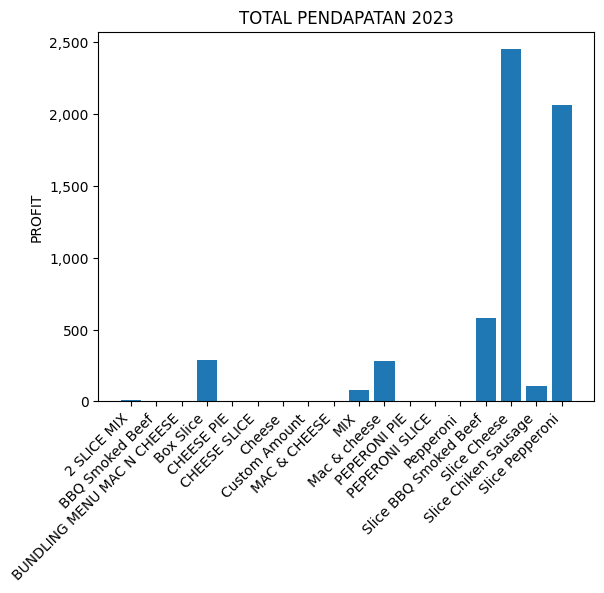

In [156]:
plt.bar(item_fav['Items'], item_fav['Quantity'])
plt.title('TOTAL QUANTITY PRODUCT 2023')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.ylabel('PROFIT')
